## Import the Data

import the opendatasets package

In [4]:
import opendatasets as od

download the data file 

In [5]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [6]:
import os 
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [7]:
import pandas as pd

In [8]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [9]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [10]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [11]:
scheme_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'

In [12]:
schema_raw = pd.read_csv(scheme_fname,  index_col= "Column").QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

we can now use schema_raw to retrive the full questions text for any column in survey_raw_df

In [13]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

***We've now loaded the datasets, and we're ready to move on the next step of preprocessing & cleaning the data for our analysis.***

## Data preparation & cleaning

we'll limit our analysis to the following areas:

1. Demographics of the survey respondents & the global programming comunity.

2. Distribution of programming skills experiencesand preferences.

3. Employment-relaated information, preferenece & opinions.

In [14]:
# let select the subset of the columns with the relevant data for our analysis.
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [15]:
len(selected_columns)

20

In [16]:
survey_df = survey_raw_df[selected_columns].copy()

In [17]:
schema = schema_raw[selected_columns]

In [18]:
survey_df.shape

(64461, 20)

In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [20]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [21]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [22]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [23]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [24]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [25]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs >140].index,inplace=True)

In [26]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [27]:
import numpy as np

In [28]:
survey_df.where(~(survey_df.Gender.str.contains(';',na = False)),np.nan ,inplace=True)

In [29]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
53539,Nepal,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,3.0,NaN,C;C++;HTML/CSS;Java;JavaScript;Python;SQL,C++;HTML/CSS;Java;JavaScript;Python;SQL,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed part-time,"Developer, desktop or enterprise applications",NaN,NaN,Industry that I’d be working in,NaN,NaN
22924,Czech Republic,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,13.0,9.0,HTML/CSS;JavaScript;Ruby;SQL,HTML/CSS;JavaScript;Ruby;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Data or business analyst;Developer, back-end;P...",35.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Somewhat important
49892,United Kingdom,37.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,19.0,14.0,C#;HTML/CSS;Java;JavaScript;PHP,C#;HTML/CSS;JavaScript;PHP,Once a year,Visit Stack Overflow,Employed full-time,Data or business analyst;Database administrato...,37.0,Slightly dissatisfied,Diversity of the company or organization;Flex ...,Never,Fairly important
55162,Italy,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",Yes,15.0,3.0,NaN,Bash/Shell/PowerShell;Python,Bash/Shell/PowerShell;Julia;Python,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;How widely us...,NaN,NaN
51261,United States,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,18.0,13.0,C;C++;Java;Objective-C;TypeScript,Kotlin;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, game or graphics;Developer, mobile",50.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
29157,United States,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,15.0,4.0,1.0,Java;Ruby,Go;Java;Python,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, back-end;Developer, QA or test",40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Fairly important
46096,Nigeria,27.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,14.0,8.0,5.0,Java;JavaScript;PHP;SQL;TypeScript,Go;Java;JavaScript;PHP;SQL;TypeScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",50.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Somewhat important
45983,Switzerland,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,8.0,20.0,8.0,NaN,NaN,NaN,NaN,Employed full-time,"Database administrator;Developer, full-stack;D...",45.0,Very dissatisfied,NaN,Often: 1-2 days per week or more,Somewhat important
33545,Canada,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,2.0,Bash/Shell/PowerShell;C#;JavaScript,C++;Python;SQL,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",35.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Never,Very important
6681,The former Yugoslav

## Exploratory Data Analysis

#### COUNTRY 
Let's look at the numbers of countries from which there are responses in the survey, and plot  the 10 countries with the highest number of responses...

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams["figure.figsize"] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [31]:
survey_df.Country.nunique()

183

In [32]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

C:\Users\chour\AppData\Local\Temp\ipykernel_13656\4105838825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_countries.index , y =  top_countries,palette='Set1');


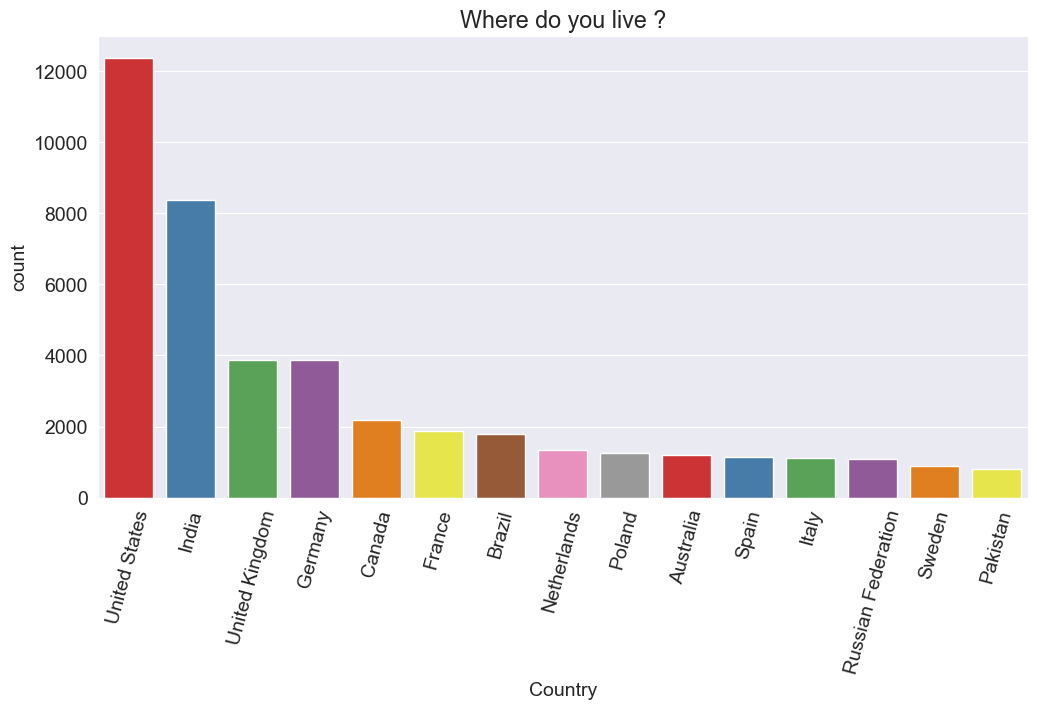

In [57]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Where do you live ?")
sns.barplot(x = top_countries.index , y =  top_countries,palette='Set1');

#### Age 
The distributio of the age of respondents is another important factor to look at , and we can use a histogram to visualize it.

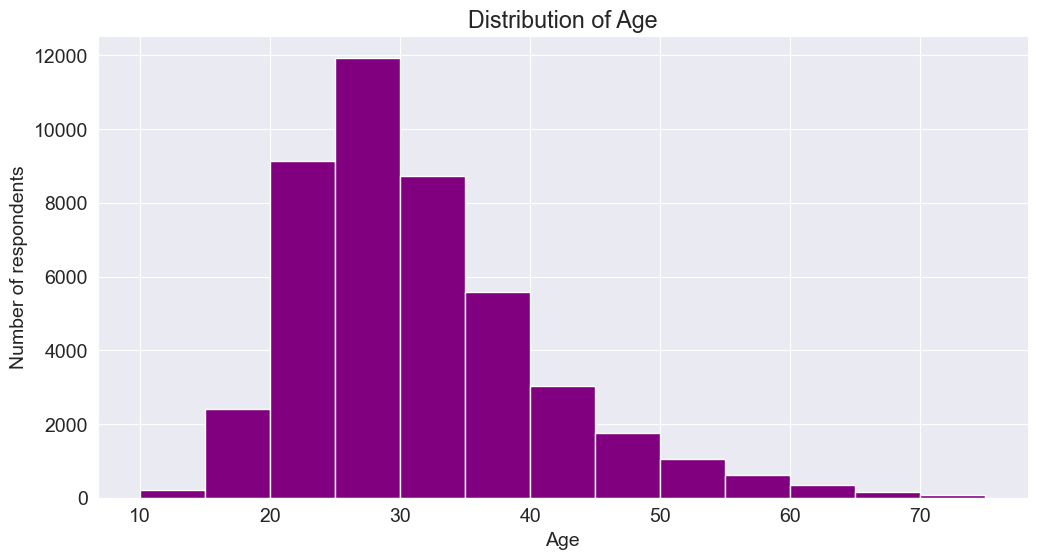

In [34]:
plt.figure(figsize=(12, 6))
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of respondents")

plt.hist(survey_df.Age, bins= np.arange(10,80,5), color="purple");

### Gender


In [35]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

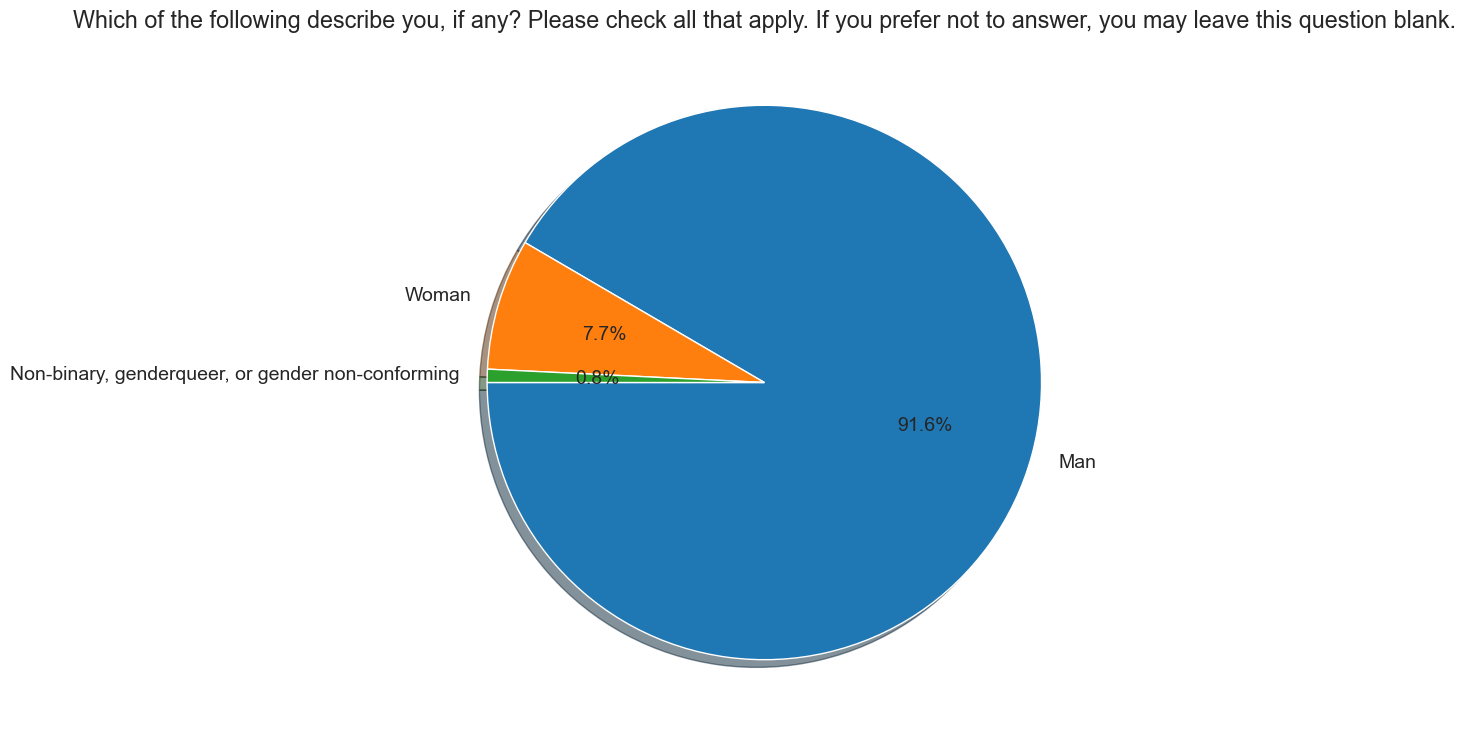

In [36]:
plt.figure(figsize=(12, 9))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%' ,shadow=True, startangle=180);

### Education level

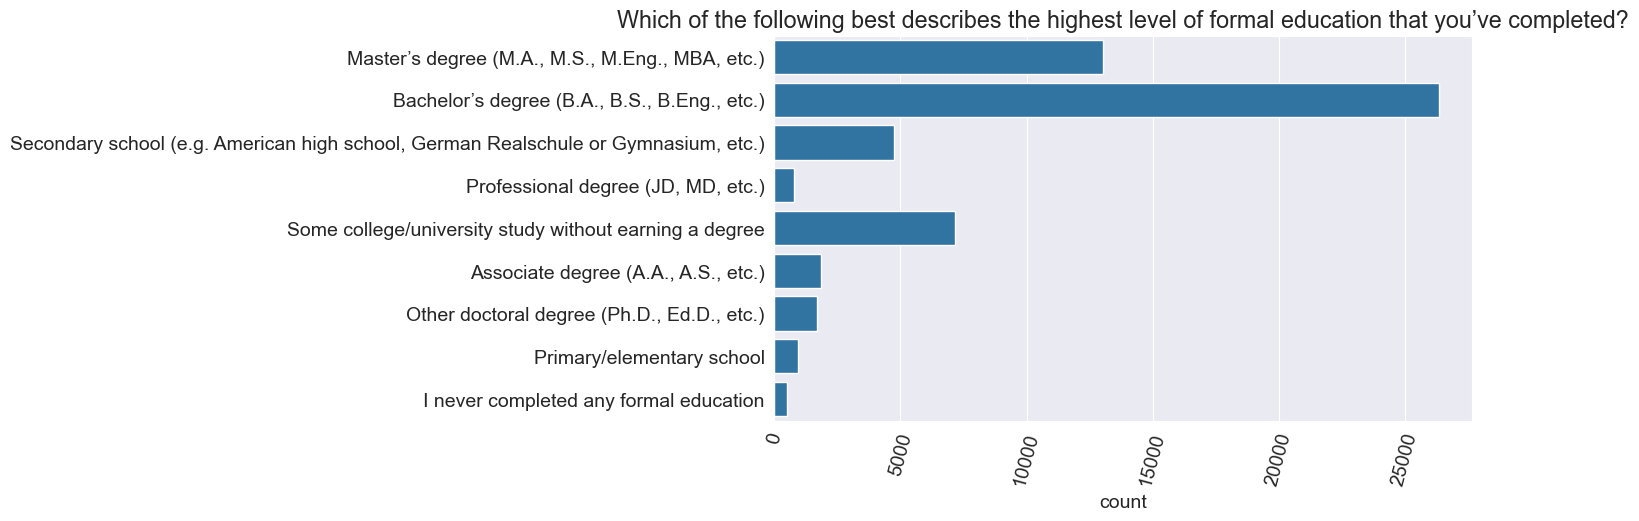

In [37]:
sns.countplot(y = survey_df.EdLevel)
plt.xticks(rotation =75)
plt.title(schema['EdLevel'])
plt.ylabel(None);

Let's also plot undergraduate majors,but this time we'll convert the numbers into percentages, and sort by percentage values to make it easier to visualize the order

Text(0.5, 0, 'Percentage')

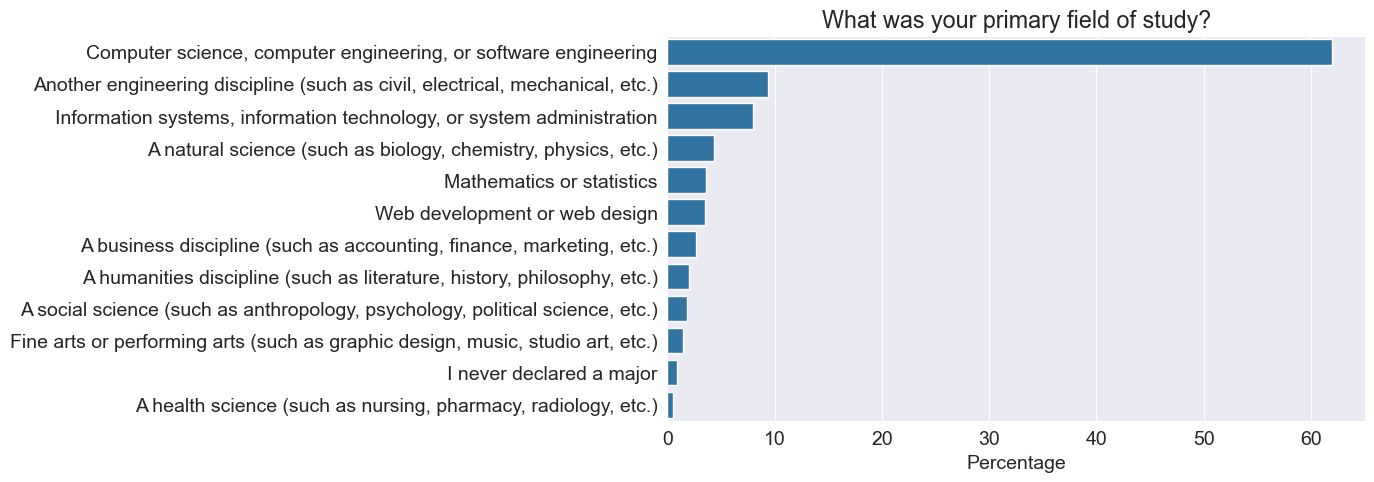

In [38]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()
sns.barplot(x =undergrad_pct , y =undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel("Percentage")

### Employment

In [39]:
schema.Employment

'Which of the following best describes your current employment status?'

In [40]:
survey_df.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

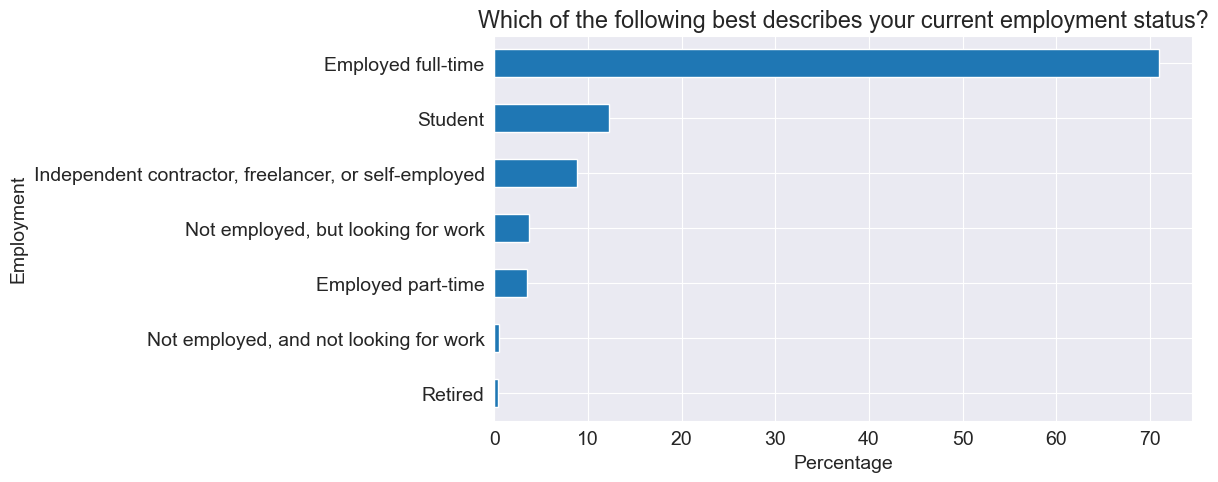

In [41]:
(survey_df.Employment.value_counts(normalize=True , ascending= True)* 100).plot(kind='barh')
plt.title(schema.Employment)
plt.xlabel("Percentage");

In [42]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [43]:
survey_df.DevType.value_counts( )

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [44]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        # Break each value into a list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if option.strip() not in options:
                options.append(option.strip())
    
    # Create new columns for each option
    for option in options:
        result_df[option] = col_series.apply(lambda x: option in x.split(';') if pd.notnull(x) else False)
    
    return result_df


In [45]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,DevType,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,"Developer, desktop or enterprise applications;...",True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Developer, full-stack;Developer, mobile",False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,Senior executive/VP,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
dev_type_df = dev_type_df.apply(pd.to_numeric, errors='coerce')
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)

dev_type_totals

Developer, back-end                              26996.0
Developer, full-stack                            26915.0
Developer, front-end                             18128.0
Developer, desktop or enterprise applications    11687.0
Developer, mobile                                 9406.0
DevOps specialist                                 5915.0
Database administrator                            5658.0
Designer                                          5262.0
System administrator                              5185.0
Developer, embedded applications or devices       4701.0
Data or business analyst                          3970.0
Data scientist or machine learning specialist     3939.0
Developer, QA or test                             3893.0
Engineer, data                                    3700.0
Academic researcher                               3502.0
Educator                                          2895.0
Developer, game or graphics                       2751.0
Engineering manager            

## Asking the Questions

We've already gained several insights about the repondents and the programming community in general, simply by exploring individual columns
 of the datasets. Let's ask some speciifc questions, and try to answer them using data frame operations adn interesting visualizations.



Q : Which were the most popular programming languages in 2020?

In [47]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [48]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [49]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [50]:
lang_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
lang_worked_df

,LanguageWorkedWith,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,C#;HTML/CSS;JavaScript,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,JavaScript;Swift,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Objective-C;Python;Swift,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,HTML/CSS;Ruby;SQL,False,True,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,HTML/CSS,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
lang_worked_df = lang_worked_df.apply(pd.to_numeric, errors='coerce')

lang_worked_percentage = lang_worked_df.mean().sort_values(ascending=False) * 100
lang_worked_percentage

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
LanguageWorkedWith             NaN
dtype: float64

C:\Users\chour\AppData\Local\Temp\ipykernel_13656\738797912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= lang_worked_percentage, y = lang_worked_percentage.index,palette="Set3");


Text(0.5, 0, 'count')

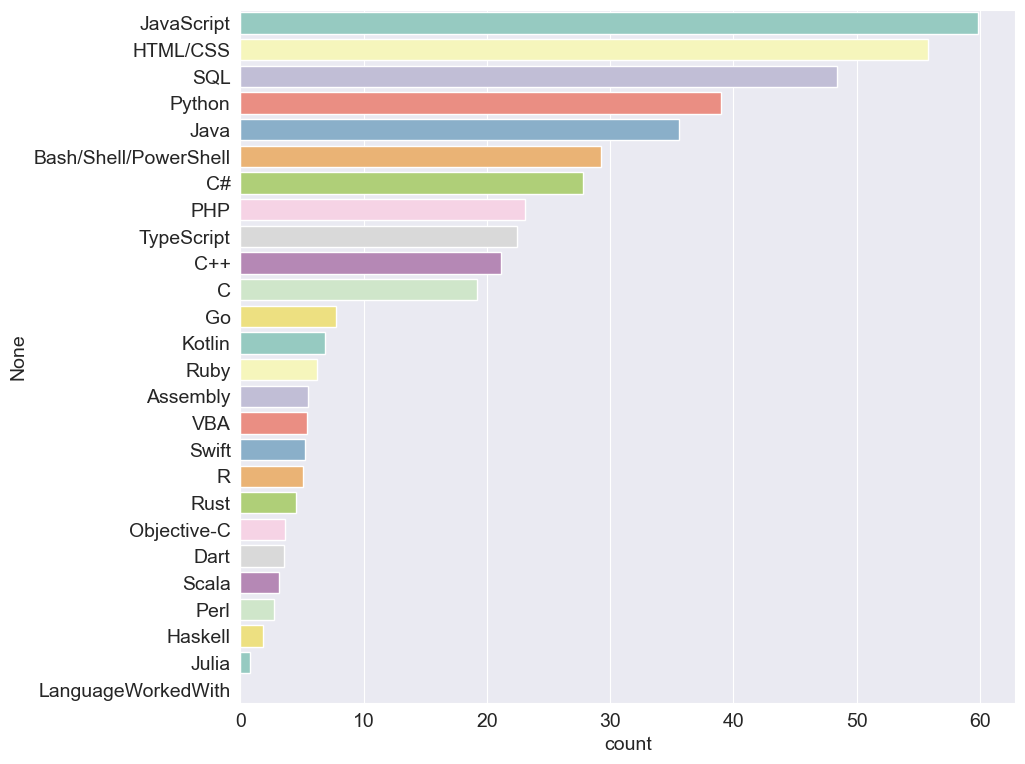

In [52]:
plt.figure(figsize=(10,9))
sns.barplot(x= lang_worked_percentage, y = lang_worked_percentage.index,palette="Set3");
plt.xlabel("count")

Q : Which language are the most people interested to learn over the next year?


In [53]:
lang_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
lang_interested_df-9

TypeError: unsupported operand type(s) for -: 'str' and 'int'